## Requirements ##
- Available libraries: numnpy, pandas, matplotlib
## Report: ##
1. Introduction
2. imple Task 1: => Copy the Code and generated Image, Explaination the steps how to collect the data, and how to clean
3. imple Task 2 
4. imple Task 3
5. Extended Task (***) => làm thêm cái GUI cho người ta chọn option, token đồ đó mà hem biết làm
6. Conclusion
7. References
8. Appendix => Source Code here
(xài tkinter để visualize cũng dc)

# Usable Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1 
Identify the average monthly temperatures for three cities of your choice and organise them as 
a two-dimensional dataset. The cities are expected to be from different climate zones. Extract 
the following statistical insights from the dataset: 
- Overall mean value 
- Overall standard deviation 
- Mean value per city 
- Standard deviation per city

In [3]:
cities_label = ["HoChiMinh", "Reykjavik", "Yakutsk"]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = {
    "Month": months,
    "HoChiMinh": [26, 27, 28, 29, 29, 28, 27, 28, 27, 27, 27, 26],
    "Reykjavik": [0, 0.56, 1.11, 3.33, 6.67, 10, 11.67, 11.11, 8.33, 4.44, 2.22, 0.56],
    "Yakutsk": [-38.3, -33.9, -20.0, -4.4, 7.8, 16.7, 19.4, 15.6, 6.1, -7.8, -27.2, -37.2]
}

# Create DataFrame
df = pd.DataFrame(data)
display(df)

#calculate ,take all rows, remove the first col
data = df.iloc[:, 1:]  


overall_mean = round(data.values.mean(),3)
overall_std = round(data.values.std(),3)
mean_per_city = data.mean()
std_per_city = round(data.std(),5)


# Print results
print("Overall Mean Temperature:", overall_mean)
print("Overall Standard Deviation:", overall_std)
print("Mean Temperature Per City:")
print(mean_per_city)
print("Standard Deviation Per City:")
print(std_per_city)



# HoChiMinh https://vi.weatherspark.com/y/116950/Th%E1%BB%9Di-Ti%E1%BA%BFt-Trung-B%C3%ACnh-%E1%BB%9F-Th%C3%A0nh-ph%E1%BB%91-H%E1%BB%93-Ch%C3%AD-Minh-Vi%E1%BB%87t-Nam-Quanh-N%C4%83m
# rejavik https://weatherspark.com/y/31501/Average-Weather-in-Reykjav%C3%ADk-Iceland-Year-Round#Figures-Temperature# CanTho https://vi.weatherspark.com/y/115861/Th%E1%BB%9Di-Ti%E1%BA%BFt-Trung-B%C3%ACnh-%E1%BB%9F-C%E1%BA%A7n-Th%C6%A1-Vi%E1%BB%87t-Nam-Quanh-N%C4%83m
# Yakutsk https://weatherspark.com/y/142848/Average-Weather-in-Yakutsk-Russia-Year-Round

,Month,HoChiMinh,Reykjavik,Yakutsk
0,Jan,26,0.00,-38.3
1,Feb,27,0.56,-33.9
2,Mar,28,1.11,-20.0
3,Apr,29,3.33,-4.4
4,May,29,6.67,7.8
5,Jun,28,10.00,16.7
6,Jul,27,11.67,19.4
7,Aug,28,11.11,15.6
8,Sep,27,8.33,6.1
9,Oct,27,4.44,-7.8


Overall Mean Temperature: 7.939
Overall Standard Deviation: 19.358
Mean Temperature Per City:
HoChiMinh    27.416667
Reykjavik     5.000000
Yakutsk      -8.600000
dtype: float64
Standard Deviation Per City:
HoChiMinh     0.99620
Reykjavik     4.38063
Yakutsk      22.01058
dtype: float64


# Task 2
Represent the dataset from Task 1 as a heat map. Provide a colour scale for guidance. Allow 
the user to specify a threshold value. Based on this threshold value, use different base colours 
to represent the average monthly temperatures 

In [4]:
def DrawBox(x, y, size, r, g, b):
    for i in range(0, int(size)):
        r = max(0, min(255, r))
        g = max(0, min(255, g))
        b = max(0, min(255, b))
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

In [5]:
hcm_temp_array = np.array(data["HoChiMinh"])
reykjavik_temp_array = np.array(data["Reykjavik"])
yakutsk_temp_array = np.array(data["Yakutsk"])

Cities = np.array([hcm_temp_array, reykjavik_temp_array, yakutsk_temp_array], dtype=int)
display(Cities)

array([[ 26,  27,  28,  29,  29,  28,  27,  28,  27,  27,  27,  26],
       [  0,   0,   1,   3,   6,  10,  11,  11,   8,   4,   2,   0],
       [-38, -33, -20,  -4,   7,  16,  19,  15,   6,  -7, -27, -37]])

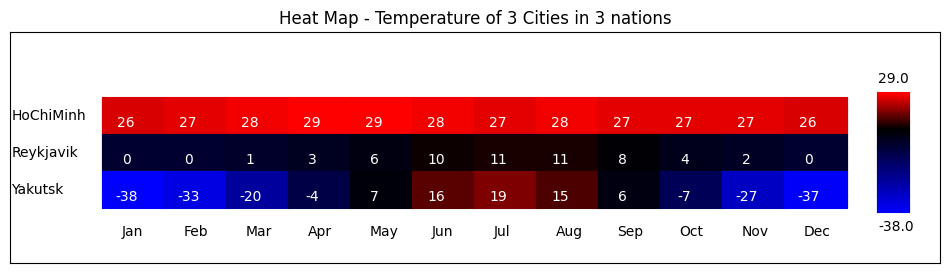

In [12]:
threshold1 = input("Enter threshold1 value (press Enter to use median as defatult): ")
if threshold1:
    threshold1 = float(threshold1)
else:
    threshold1 = np.median(Cities)


Min = np.min(Cities)
Max = np.max(Cities)

# Setup the plotting area
figure = plt.figure(figsize=(12,3))
plt.axis([0, 600, 0, 250])
plt.xticks([])
plt.yticks([])

# Initialise box size and offsets
BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(12)

for i in range(Cities.shape[0]):
    for j in range(Cities.shape[1]):
        temp = Cities[i, j]

        if temp < threshold1:  # cold -> black
            ColourCode = int(255 * (1 - (temp - Min) / (threshold1 - Min)))
            DrawBox(60 + BoxSize * j, 140 - BoxSize * i, BoxSize, 0, 0, ColourCode)

        elif temp >= threshold1:  # black -> hot
            ColourCode = int(255 * (temp - threshold1) / (Max - threshold1))
            DrawBox(60 + BoxSize * j, 140 - BoxSize * i, BoxSize, ColourCode, 0, 0)

        else:  
            DrawBox(60 + BoxSize * j, 140 - BoxSize * i, BoxSize, 0, 0, 0)

        plt.text(OffsetX + 60 + BoxSize * j, OffsetY + 140 - BoxSize * i, str(temp),
                 color='#FFFFFF', ha='center', va='center')

# Scale theo threshold1
legend_height = 130
legend_y_start = 55

for i in range(legend_height):
    position_ratio = i / (legend_height - 1)
    current_temp = Min + position_ratio * (Max - Min)

    if current_temp < threshold1:
        if threshold1 != Min:
            cold_ratio = (current_temp - Min) / (threshold1 - Min)
        else:
            cold_ratio = 0  
        blue_value = 1.0 - cold_ratio
        color = (0.0, 0.0, blue_value)

    else:
        if threshold1 != Max:
            hot_ratio = (current_temp - threshold1) / (Max - threshold1)
        else:
            hot_ratio = 0  
        red_value = hot_ratio
        color = (red_value, 0.0, 0.0)

    y_position = legend_y_start + i
    plt.plot([560, 580], [y_position, y_position], color=color)


# Labels for legend
plt.text(560, legend_y_start - 20, f"{Min:.1f}")
plt.text(560, legend_y_start + legend_height + 10, f"{Max:.1f}")


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for j, month in enumerate(months):
    plt.text(72 + BoxSize * j, 30, month, fontsize=10)


cities_label = ['HoChiMinh', 'Reykjavik', 'Yakutsk']
for i, city in enumerate(cities_label):
    plt.text(1, 155 - i * 40, city)


plt.title("Heat Map - Temperature of 3 Cities in 3 nations")
plt.show()
figure.savefig("heatmap_3cities.jpg")
plt.close()

# Task 3
Represent the dataset from Task 1 by using parallel coordinates. Use different colours for each 
city's average monthly temperatures. Add appropriate labels to the chart.

In [7]:
features = cities_label
x_positions = np.arange(len(features))  
print(x_positions)
print("Columns in df:", df.columns.tolist())  
print("Features list:", features) 

[0 1 2]
Columns in df: ['Month', 'HoChiMinh', 'Reykjavik', 'Yakutsk']
Features list: ['HoChiMinh', 'Reykjavik', 'Yakutsk']


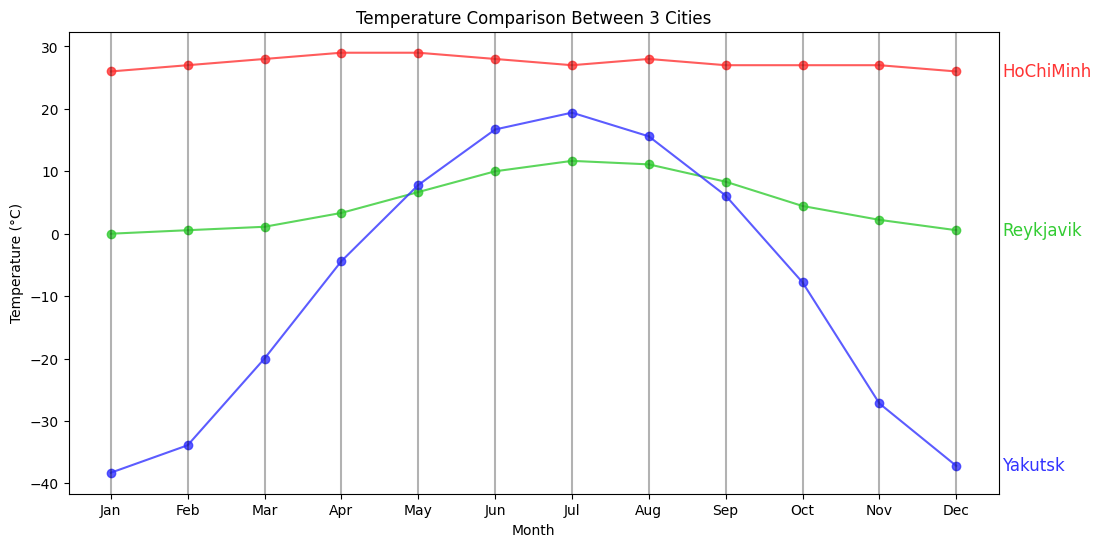

In [8]:
x_positions = np.arange(len(months))

colors = {
    "HoChiMinh": (1.0, 0.2, 0.2),   
    "Reykjavik": (0.2, 0.8, 0.2),   
    "Yakutsk": (0.2, 0.2, 1.0)      
}

# Plot
plt.figure(figsize=(12, 6))
x_positions = np.arange(len(months))

for city in colors.keys():
    values = df[city].values  
    plt.plot(x_positions, values, marker='o', alpha=0.8, color=colors[city])

    # Add city labels at the end of each line
    last_x = x_positions[-1]
    last_y = values[-1]
    plt.text(last_x + 0.6, last_y, city, fontsize=12, color=colors[city], verticalalignment='center')

for x in x_positions:
    plt.axvline(x=x, color='black', linestyle='-', alpha=0.3)

plt.xticks(x_positions, months, rotation=0)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Comparison Between 3 Cities")

plt.show()